## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
boolseries = df['Mouse ID'].duplicated()
duplicates_df = df[boolseries]
duplicates_df[['Mouse ID', 'Timepoint']]

,Mouse ID,Timepoint
1,k403,5
2,k403,10
3,k403,15
4,k403,20
5,k403,25
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df[~boolseries]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].count()

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

'''Assuming this is meant to be done on the original data not the clean data as doing 
it on the clean data returns a useless table'''

reg_group = df.groupby('Drug Regimen')

reg_mean = reg_group['Tumor Volume (mm3)'].mean()

reg_med = reg_group['Tumor Volume (mm3)'].median()

reg_var = reg_group['Tumor Volume (mm3)'].var()

reg_std = reg_group['Tumor Volume (mm3)'].std()

reg_sem = reg_group['Tumor Volume (mm3)'].sem()

reg_df = pd.DataFrame({'Mean':reg_mean,'Median':reg_med,'Variance':reg_var,'Standard Deviation':reg_std,'SEM':reg_sem})
reg_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

agg_df = reg_group['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

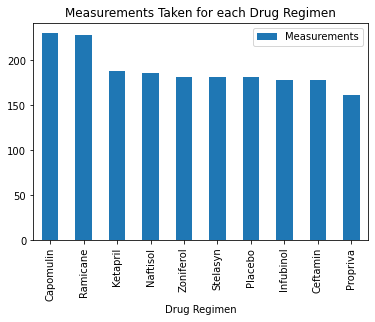

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements = pd.DataFrame(df['Drug Regimen'].value_counts())
measurements = measurements.reset_index()
measurements = measurements.rename(columns={'index':'Drug Regimen','Drug Regimen':'Measurements'})
measurements.plot.bar(x='Drug Regimen', y='Measurements', title='Measurements Taken for each Drug Regimen')

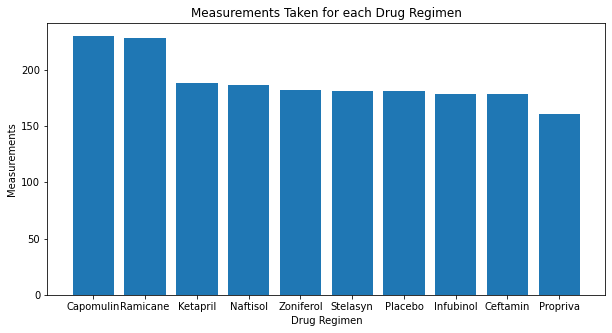

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs = measurements['Drug Regimen']
mcounts = measurements['Measurements']
fig = plt.figure(figsize = (10, 5))

plt.bar(drugs, mcounts)
plt.xlabel('Drug Regimen')
plt.ylabel('Measurements')
plt.title('Measurements Taken for each Drug Regimen')
plt.show()

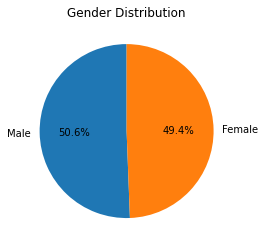

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gendercounts = df['Sex'].value_counts()
gendercounts.name = ''
gendercounts.plot(kind='pie', autopct='%1.1F%%', startangle=90, title='Gender Distribution')

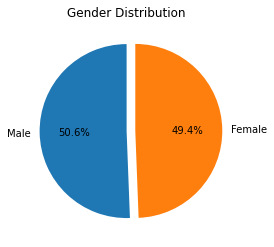

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig, ax = plt.subplots()
ax.pie(gendercounts, labels=gendercounts.index, autopct='%1.1F%%', startangle=90, explode=(0,0.1))
plt.title('Gender Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
ascending_df = df.sort_values(by='Timepoint', ascending=True)
boolseries2 = ascending_df['Mouse ID'].duplicated(keep='last')
lastmice = df[~boolseries2]
lastmice = lastmice.reset_index(drop=True)
lastmice = pd.DataFrame(lastmice)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#lastmice[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
lastmice

C:\Users\alex\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [16]:
import numpy as np
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#test_df = pd.DataFrame()
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
boolseries3 = lastmice['Drug Regimen'].isin(treatments)
test_df = lastmice[boolseries3]
#test_df.set_index('Drug Regimen', drop=True, inplace=True)

for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    q1, q3 = np.percentile(sorted(test_df['Tumor Volume (mm3)']), [25, 75])
    iqr = q3 - q1
    print(f'IQR for {treatment}: {iqr}')    
    
    # add subset 
    #volume = test_df['Tumor Volume (mm3)'] if test_df.loc[test_df['Drug Regimen'] == treatment]
    #tumor_vol.append(volume)
    
    # Determine outliers using upper and lower bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = (test_df['Tumor Volume (mm3)'].loc[(test_df['Tumor Volume (mm3)'] < lower_bound) | (test_df['Tumor Volume (mm3)'] > upper_bound)]).count()
    
    print(f'Lower Bound for {treatment}: {lower_bound}')
    print(f'upper Bound for {treatment}: {upper_bound}')
    print(f'Number of outliers: {outliers}')
    print(f'')


IQR for Capomulin: 22.74251795250001
Lower Bound for Capomulin: 3.0739668737499812
upper Bound for Capomulin: 94.04403868375002
Number of outliers: 0

IQR for Ramicane: 22.74251795250001
Lower Bound for Ramicane: 3.0739668737499812
upper Bound for Ramicane: 94.04403868375002
Number of outliers: 0

IQR for Infubinol: 22.74251795250001
Lower Bound for Infubinol: 3.0739668737499812
upper Bound for Infubinol: 94.04403868375002
Number of outliers: 0

IQR for Ceftamin: 22.74251795250001
Lower Bound for Ceftamin: 3.0739668737499812
upper Bound for Ceftamin: 94.04403868375002
Number of outliers: 0



Capomulin         AxesSubplot(0.1,0.559091;0.363636x0.340909)
Ceftamin     AxesSubplot(0.536364,0.559091;0.363636x0.340909)
Infubinol             AxesSubplot(0.1,0.15;0.363636x0.340909)
Ramicane         AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

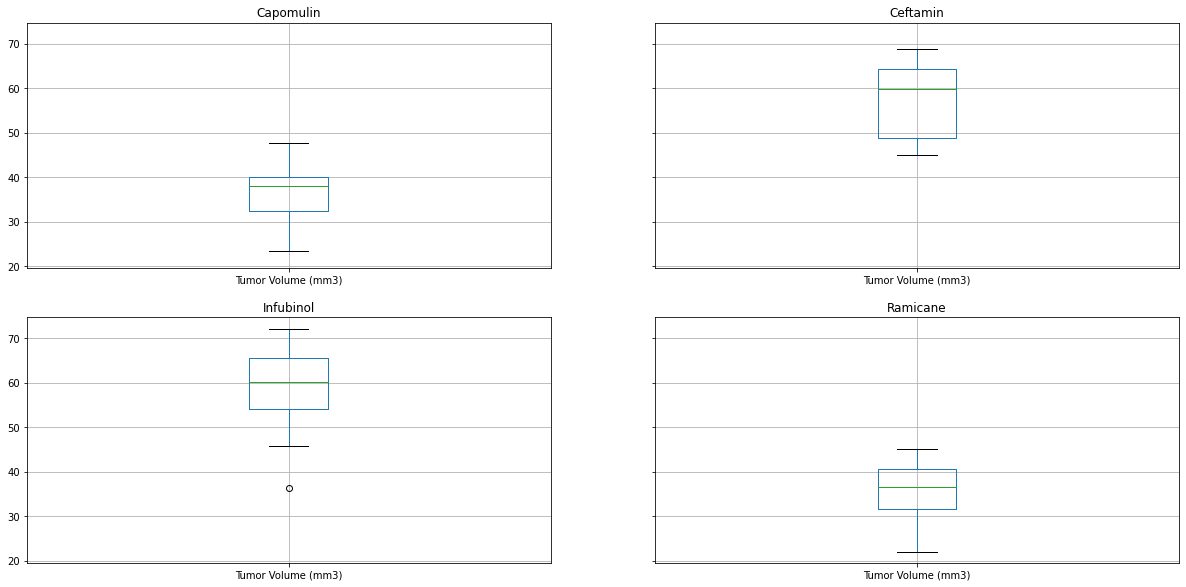

In [17]:
test2_df = test_df[['Drug Regimen', 'Tumor Volume (mm3)']]
test2_df.groupby(['Drug Regimen']).boxplot(figsize=(20,10))

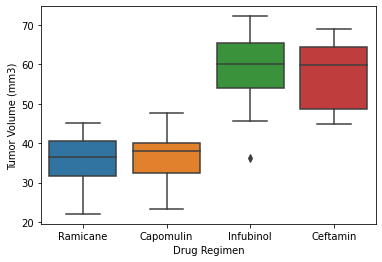

In [18]:
import seaborn as sns
sns.boxplot(y='Tumor Volume (mm3)', x='Drug Regimen', data=test_df)

In [19]:
tumor_vol

[]

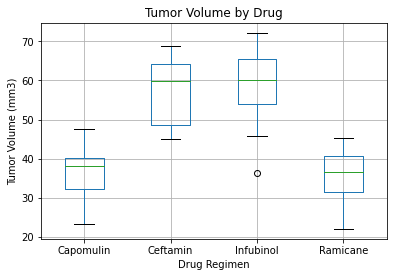

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

bplot = df.sort_values(['Mouse ID', 'Timepoint']).drop_duplicates(subset='Mouse ID', keep='last').loc[lambda x: x['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])].boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', return_type='axes')
bplot[0].set_ylabel('Tumor Volume (mm3)')
fig = bplot[0].get_figure()
fig.suptitle('')
bplot[0].set_title('Tumor Volume by Drug')
plt.show()

## Line and Scatter Plots

In [21]:
df.loc[df['Drug Regimen'] == 'Capomulin']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


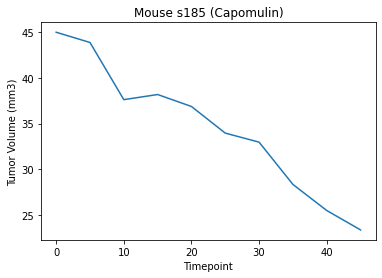

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capmouse = df.loc[df['Mouse ID'] == 's185']

plt.plot(capmouse['Timepoint'], capmouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse s185 (Capomulin)')
plt.show()

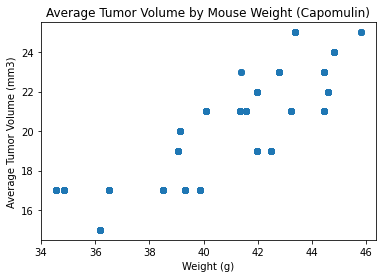

In [35]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = df.loc[df['Drug Regimen'] == 'Capomulin']
avg_tumvol = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)':'Average Tumor Volume (mm3)'})
capomulin_df2 = pd.merge(capomulin_df, avg_tumvol, on='Mouse ID')
plt.scatter(capomulin_df2['Average Tumor Volume (mm3)'], capomulin_df2['Weight (g)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Mouse Weight (Capomulin)')
plt.show()

## Correlation and Regression

The correlation coefficient is 0.83


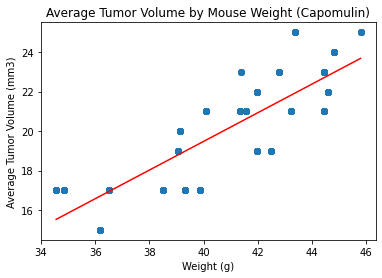

In [42]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = capomulin_df2['Average Tumor Volume (mm3)']
y = capomulin_df2['Weight (g)']
res = st.linregress(x, y)
cor = st.pearsonr(x, y)
print(f'The correlation coefficient is {round(cor[0], 2)}')
plt.scatter(capomulin_df2['Average Tumor Volume (mm3)'], capomulin_df2['Weight (g)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Mouse Weight (Capomulin)')
plt.plot(x, res.intercept + res.slope*x, 'r')
plt.show()